### Implement the CNN model for classifying CIFAR10 image dataset by dividing the model into following 4 stages:
        a. Loading and preprocessing the image data
        b. Defining the model's architecture
        c. Training the model
        d. Estimating the model's performance

In [1]:
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

2022-11-15 15:09:46.130134: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-15 15:09:48.606466: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-15 15:09:48.606517: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-15 15:09:48.792712: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-15 15:10:14.686565: W tensorflow/stream_executor/platform/de

In [2]:
(x_train, y_train), (x_test,y_test) = cifar10.load_data()

#if there are 2 datasets mnist_train.csv and mnist_test.csv

# train_data = pd.read_csv('mnist_train.csv')
# test_data = pd.read_csv('mnist_test.csv')

# x_train = train_data.drop('labels', axis=1)
# x_test = test_data.drop('labels', axis=1)

# y_train = train_data['labels']
# y_test =  test_data['labels']

In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [4]:
## Reshaping by converting to array
x_train = np.array(x_train)
x_test = np.array(x_test)

x_train = x_train.reshape((x_train.shape[0], 32, 32, 3))
x_test = x_test.reshape((x_test.shape[0], 32, 32, 3))

In [5]:
## Scaling 
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

## Defining the model's architecture

In [6]:
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(10,activation='softmax'))

2022-11-15 15:10:40.737909: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-15 15:10:40.737956: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-15 15:10:40.737990: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (akash-kulkarni): /proc/driver/nvidia/version does not exist
2022-11-15 15:10:40.738379: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
# Model Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [8]:
## Train Data
batch_size = 128
epochs = 10
history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

2022-11-15 15:10:41.699166: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10
391/391 [==============================] - 35s 88ms/step - loss: 1.6648 - accuracy: 0.3890
Epoch 2/10
391/391 [==============================] - 35s 89ms/step - loss: 1.3317 - accuracy: 0.5237
Epoch 3/10
391/391 [==============================] - 31s 80ms/step - loss: 1.1934 - accuracy: 0.5750
Epoch 4/10
391/391 [==============================] - 31s 81ms/step - loss: 1.0895 - accuracy: 0.6164
Epoch 5/10
391/391 [==============================] - 35s 89ms/step - loss: 1.0162 - accuracy: 0.6424
Epoch 6/10
391/391 [==============================] - 36s 92ms/step - loss: 0.9618 - accuracy: 0.6630
Epoch 7/10
391/391 [==============================] - 35s 90ms/step - loss: 0.9107 - accuracy: 0.6805
Epoch 8/10
391/391 [==============================] - 36s 92ms/step - loss: 0.8663 - accuracy: 0.6971
Epoch 9/10
391/391 [==============================] - 34s 87ms/step - loss: 0.8298 - accuracy: 0.7090
Epoch 10/10
391/391 [==============================] - 33s 86ms/step - loss: 0.800

## Estimating the model's performance

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

2022-11-15 15:16:28.326786: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.


313/313 [==============================] - 3s 8ms/step - loss: 0.8796 - accuracy: 0.7030
Test Loss: 0.8795669078826904, Test Accuracy: 0.703000009059906


In [10]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


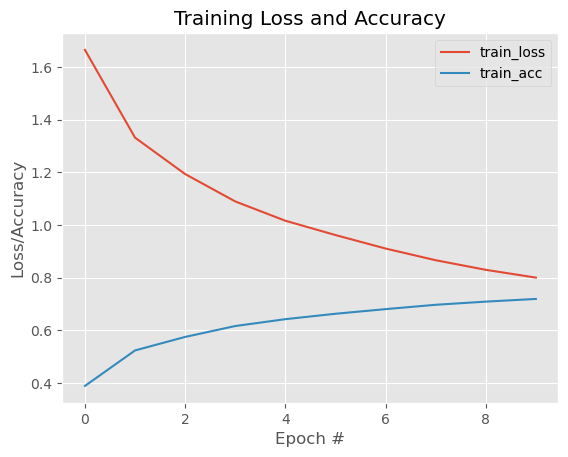

In [11]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), history.history["accuracy"], label="train_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()